In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import loadmat
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Entropy of Real Cell

In [2]:
def Entropy(rstate, binnum, overlap = True):
    rstate[rstate>1] = 1
    wordsCollection = []
    if overlap:
        for i in np.arange(0,len(rstate)-binnum+1):
            wordsCollection.append(rstate[i:i+binnum])
    else:
        for i in np.arange(0,len(rstate)-binnum+1,binnum):
            wordsCollection.append(rstate[i:i+binnum])
    _, index = np.unique(np.array(wordsCollection), axis = 0, return_inverse=True)
    N, _ = np.histogram(index,bins=np.append(np.unique(index),max(index)))
    P = N/np.sum(N)
    entropy = -np.sum(P*np.log2(P))
    return entropy

# Load Data and Check Input

In [3]:
dt = 0.01

annots = loadmat('D:\\GoogleDrive\\retina\\Troy\'s data\\20211126\\SplitData\\diode_AM_LPOU_1s1Hz_200-50ms_10-2mW_27-Nov-2021_0', squeeze_me = True)
sampling_rate = 20000

TicTocer = annots['a_data'][1]
startPoint = np.where(TicTocer>38000)[0][0]
endPoint = np.where(TicTocer>38000)[0][-1]
x = annots['a_data'][0, startPoint:endPoint+1]
x = np.convolve(x, np.ones(int(sampling_rate*dt*0.5))/int(sampling_rate*dt*0.5), 'same')
x = x[int(sampling_rate*dt*0.5)::int(sampling_rate*dt)]
x = x.astype(float)
x = (x-np.mean(x))/np.std(x)
T = np.arange(len(x))*dt

Spike_Cell = [0]*60
for channelnumber in np.arange(1,61):
    Spike = annots['Spikes'][channelnumber-1]
    Spike_Cell[channelnumber-1] = Spike[np.where(Spike>startPoint/sampling_rate)[0][0]:np.where(Spike<endPoint/sampling_rate)[0][-1]]-startPoint/sampling_rate

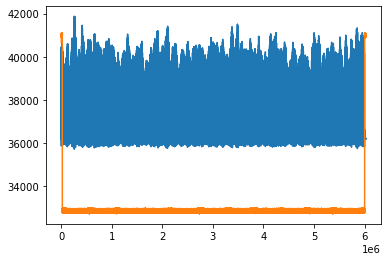

In [4]:
plt.plot(annots['a_data'][0, startPoint:endPoint+1])
plt.plot(annots['a_data'][1, startPoint:endPoint+1])

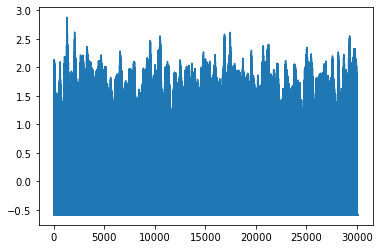

In [5]:
plt.plot(x)